In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
# Colab loading
mask_data = np.load("drive/MyDrive/Colab Notebooks/COMP3710/mask_data.npy")
input_data = np.load("drive/MyDrive/Colab Notebooks/COMP3710/input_data.npy")

In [13]:
mask_data = mask_data / 255.0
input_data = input_data / 255.0

In [14]:
print(mask_data.shape)
print(input_data.shape)

(2594, 256, 192)
(2594, 256, 192)


In [16]:
# Split the data 
X_train, X_test, Y_train, Y_test = train_test_split(input_data, mask_data, test_size = 0.2, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [17]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
test_data = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
val_data = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

In [40]:
def display_image(data,num):
  plt.figure(figsize=(10,3*num))
  i = 1
  for X,Y in data.take(num):
    plt.subplot(num, 2, i)
    plt.imshow(X, cmap='gray')
    plt.axis('off')
    i += 1
    plt.subplot(num, 2, i)
    plt.imshow(Y, cmap='gray')
    plt.axis('off')
    i += 1
  plt.show()

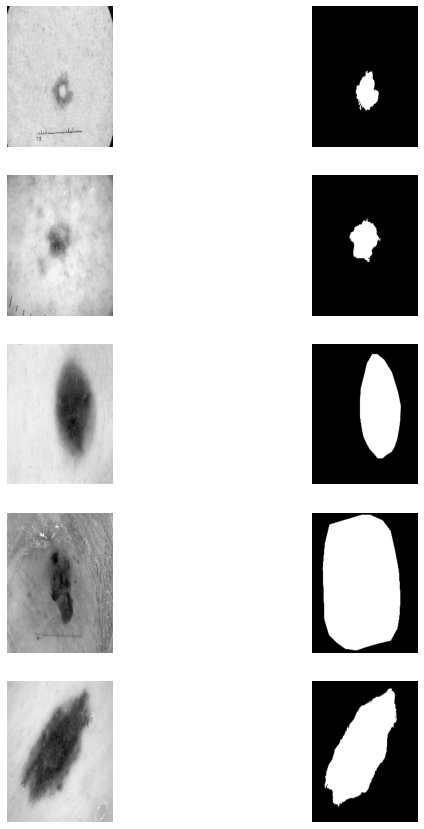

In [41]:
display_image(train_data,5)